In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

In [2]:
file = 'csv/glassdoor_data_scientist_canada_221118_150_cleaned.csv'
df = pd.read_csv(file)
df.head(10)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Division,Location,Size,Founded,Type of ownership,...,R_Studio,spark,aws,excel,BigQuery,SQL_Server,Docker,Jira,hybrid,remote
0,Junior Data Scientist,CA$74K - CA$90K (Glassdoor est.),We are looking for our next Junior Data Scient...,3.9,M&M Food Market\n3.9,-1,Mississauga,1001 to 5000 Employees,-1,Company - Private,...,0,1,0,1,0,0,0,0,0,0
1,Data Scientist,CA$85K - CA$120K (Glassdoor est.),Referred applicants should not apply directly ...,3.6,Loblaw Companies Limited\n3.6,-1,Brampton,10000+ Employees,-1,Company - Public,...,0,1,0,1,0,0,0,1,1,1
2,Data Scientist – Revenue Management,CA$84K - CA$96K (Glassdoor est.),Powered by water... and by people like you\n\n...,-1.0,BC Hydro\n3.8,-1,Vancouver,1001 to 5000 Employees,-1,Self-employed,...,0,0,0,0,0,0,0,0,1,1
3,Data Scientist,CA$55K - CA$122K (Glassdoor est.),Join our Winning Team as a Data Scientist\nWhe...,4.5,Carfax\n4.5,-1,London,1001 to 5000 Employees,1984,Company - Public,...,0,1,0,0,0,0,0,0,0,0
4,Analytics Data Scientist,CA$65K - CA$100K (Employer est.),BrainFinance is a leading financial technology...,-1.0,Brain Finance,-1,Montreal,Unknown,-1,Company - Private,...,0,0,0,1,0,0,0,0,0,0
5,"Team Lead, Decision Scientist for Cancer Scree...",CA$54K - CA$85K (Glassdoor est.),Want to make a difference in your career? Cons...,3.0,Ontario Health\n3.0,-1,Toronto,10000+ Employees,-1,Company - Public,...,0,0,0,1,0,0,0,0,1,0
6,Junior Software Developer: Data Science,CA$55K - CA$75K (Employer est.),About Us\nCopperstone helps mining companies m...,5.0,Copperstone Technologies Ltd.\n5.0,-1,Edmonton,1 to 50 Employees,-1,Company - Private,...,0,1,0,0,1,0,0,0,0,1
7,Data Scientist (Deep Learning),CA$135K - CA$150K (Employer est.),Le Data Scientist (Deep Learning) fera partie ...,5.0,DELAN - Chasseurs de Talents en TI\n5.0,-1,Montreal,1 to 50 Employees,1997,Company - Private,...,0,1,0,0,0,0,0,0,1,0
8,Data Scientist,CA$134K - CA$191K (Glassdoor est.),"As a Data Scientist, you’ll bring a deep under...",-1.0,Maarut Inc,-1,Calgary,51 to 200 Employees,-1,Private Practice / Firm,...,0,0,0,1,0,0,0,0,1,1
9,Data Scientist Lead,CA$71K - CA$125K (Glassdoor est.),Job ID #349220\nData Scientist Lead\nOn behalf...,3.9,Procom\n3.9,-1,Vancouver,5001 to 10000 Employees,1978,Company - Private,...,0,1,0,1,0,0,0,0,0,0


In [3]:
df.iloc[1]

Job Title                                               Data Scientist
Salary Estimate                      CA$85K - CA$120K (Glassdoor est.)
Job Description      Referred applicants should not apply directly ...
Rating                                                             3.6
Company Name                             Loblaw Companies Limited\n3.6
Division                                                            -1
Location                                                      Brampton
Size                                                  10000+ Employees
Founded                                                             -1
Type of ownership                                     Company - Public
Industry                                               Vehicle Dealers
Sector                                              Retail & Wholesale
Revenue                                             $10+ billion (USD)
Company                                       Loblaw Companies Limited
Hourly

In [4]:
## Parse Job Title

In [5]:
# Job title 
def title(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'data scientist' in title.lower():
        return 'data scientist'
    elif 'developer' in title.lower():
        return 'developer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'business intelligence' in title.lower() or 'intelligence' in title.lower():
        return 'business intelligence'
    elif 'scientist' in title.lower() or 'science' in title.lower():
        return 'scientist'
    elif 'specialist' in title.lower() or 'data specialist' in title.lower():
        return 'specialist'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'coop' in title.lower() or 'co-op' in title.lower() or 'student' in title.lower():
        return 'coop'
    else:
        return 'na'
    
# Senority
def senority(title):
    if 'senior' in title.lower() or 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'junior' in title.lower() or 'jr' in title.lower() or 'jr.' in title.lower():
        return 'junior'
    else:
        return 'na'

In [6]:
# View job title distributions
df['title'] = df['Job Title'].apply(title)
df['title'].value_counts()

data scientist           44
analyst                  24
scientist                 9
mle                       9
specialist                4
na                        3
business intelligence     3
developer                 1
data engineer             1
coop                      1
Name: title, dtype: int64

In [7]:
# View senority distribution
df['senority'] = df['Job Title'].apply(senority)
df['senority'].value_counts()

na        89
senior     7
junior     3
Name: senority, dtype: int64

In [8]:
df.loc[df['title']=='na']

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Division,Location,Size,Founded,Type of ownership,...,aws,excel,BigQuery,SQL_Server,Docker,Jira,hybrid,remote,title,senority
28,Data Lead (Remote),CA$49K - CA$58K (Glassdoor est.),Data Lead (Remote) Ref # VS1114223\nThe Career...,4.3,The Career Foundation\n4.3,-1,Toronto,1 to 50 Employees,-1,Nonprofit Organization,...,0,0,0,0,0,0,0,1,na,senior
50,Data Lead (Remote),CA$49K - CA$58K (Glassdoor est.),Data Lead (Remote) Ref # VS1114223\nThe Career...,4.3,The Career Foundation\n4.3,-1,Toronto,1 to 50 Employees,-1,Nonprofit Organization,...,0,0,0,0,0,0,0,1,na,senior
69,Data Lead (Remote),CA$49K - CA$58K (Glassdoor est.),Data Lead (Remote) Ref # VS1114223\nThe Career...,4.3,The Career Foundation\n4.3,-1,Toronto,1 to 50 Employees,-1,Nonprofit Organization,...,0,0,0,0,0,0,0,1,na,senior


In [9]:
## Location

In [10]:
# View locations
df['Location'].value_counts()

Toronto            33
Vancouver          22
Montreal            9
Mississauga         7
Edmonton            3
Halifax             3
Brampton            3
London              2
Calgary             2
North York          2
Aurora              2
Fredericton         1
Markham             1
Victoria            1
Burnaby             1
North Vancouver     1
Cranbrook           1
Oakville            1
Remote              1
Whitby              1
Richmond            1
Burlington          1
Name: Location, dtype: int64

In [11]:
## Salary

In [12]:
# Converting hourly salary to annual salary

# Assumptions:
# 40 hours/week
# 50 weeks/year
df['min_salary'] = df.apply(lambda x: x.min_salary*(40*50)/1000 if x.Hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*(40*50)/1000 if x.Hourly ==1 else x.max_salary, axis =1)
df['avg_salary'] = df.apply(lambda x: x.avg_salary*(40*50)/1000 if x.Hourly ==1 else x.avg_salary, axis =1)

In [13]:
df[df.Hourly==1][['min_salary', 'max_salary', 'avg_salary']]

,min_salary,max_salary,avg_salary
32,38.32,121.32,79.82
37,50.00,50.00,50.00
42,76.00,76.00,76.00
43,76.00,76.00,76.00


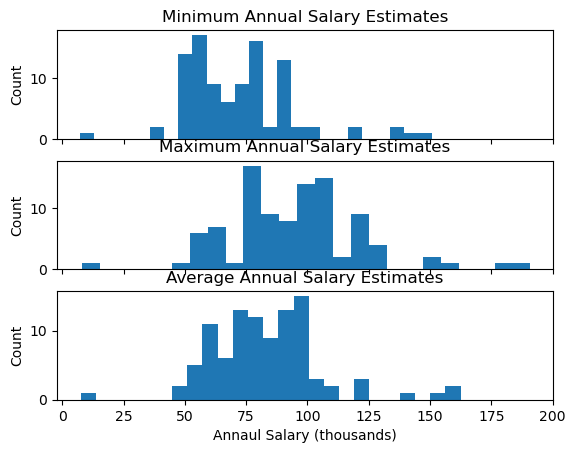

In [14]:
fig, axs = plt.subplots(3, sharex=True)

axs[0].set_title('Minimum Annual Salary Estimates')
axs[0].hist(df['min_salary'], bins=25, 
         histtype ='bar')

axs[1].set_title('Maximum Annual Salary Estimates')
axs[1].hist(df['max_salary'], bins=25, 
         histtype ='bar')

axs[2].set_title('Average Annual Salary Estimates')
axs[2].hist(df['avg_salary'], bins=25, 
         histtype ='bar')

for ax in axs.flat:
    ax.set(xlabel='Annaul Salary (thousands)', ylabel='Count')

for ax in axs.flat:
    ax.label_outer()
    


In [15]:
df['Type of ownership'] = df['Type of ownership'].apply(lambda x: 'N/A' if x == "-1" else x)
df['Type of ownership'].value_counts()

Company - Private          47
Company - Public           29
N/A                        10
Nonprofit Organization      6
Government                  4
Self-employed               1
Private Practice / Firm     1
Contract                    1
Name: Type of ownership, dtype: int64

In [16]:
df.iloc[:, 20:34].sum()

Python        73
R              8
SQL           62
Java          16
R_Studio       0
spark         19
aws           12
excel         56
BigQuery       8
SQL_Server     2
Docker         4
Jira           3
hybrid        30
remote        36
dtype: int64

In [40]:
df['Revenue'] = df['Revenue'].apply(lambda x: 'Unknown' if x == "-1" or x == "Unknown / Non-Applicable" else x)
df['Revenue'].value_counts()

Unknown                             41
$10+ billion (USD)                  25
$1 to $5 million (USD)               9
$5 to $25 million (USD)              7
$1 to $5 billion (USD)               4
$25 to $100 million (USD)            3
$100 to $500 million (USD)           3
$500 million to $1 billion (USD)     3
$5 to $10 billion (USD)              3
Less than $1 million (USD)           1
Name: Revenue, dtype: int64

In [41]:
df[['Revenue', 'avg_salary']].groupby(['Revenue']).mean().sort_values(by=['avg_salary'], ascending=False)

,avg_salary
Revenue,
$100 to $500 million (USD),103.500000
$1 to $5 billion (USD),95.000000
$25 to $100 million (USD),93.000000
$10+ billion (USD),89.640000
$1 to $5 million (USD),87.277778
Unknown,79.300488
$5 to $10 billion (USD),78.000000
Less than $1 million (USD),77.500000
$500 million to $1 billion (USD),72.166667


In [38]:
df['Size'] = df['Size'].apply(lambda x: 'Unknown' if x == "-1" else x)
df['Size'].value_counts()

10000+ Employees           32
Unknown                    16
1 to 50 Employees          12
1001 to 5000 Employees     10
51 to 200 Employees        10
201 to 500 Employees        8
5001 to 10000 Employees     7
501 to 1000 Employees       4
Name: Size, dtype: int64

In [39]:
df[['Size', 'avg_salary']].groupby(['Size']).mean().sort_values(by=['avg_salary'], ascending=False)

,avg_salary
Size,
201 to 500 Employees,90.500000
10000+ Employees,87.000000
501 to 1000 Employees,85.750000
1 to 50 Employees,85.458333
5001 to 10000 Employees,85.214286
1001 to 5000 Employees,83.250000
51 to 200 Employees,83.100000
Unknown,70.926250


In [23]:
df['Industry'] = df['Industry'].apply(lambda x: 'Unknown' if x == "-1" else x)
df['Industry'].value_counts()

Unknown                                    21
HR Consulting                              11
Banking & Lending                          10
Enterprise Software & Network Solutions    10
Cable, Internet & Telephone Providers       9
Taxi & Car Services                         6
Information Technology Support Services     6
Construction                                5
National Agencies                           4
Grantmaking & Charitable Foundations        3
Health Care Services & Hospitals            3
Transportation Equipment Manufacturing      2
Farm Support                                2
Telecommunications Services                 1
Animal Production                           1
Software Development                        1
Vehicle Dealers                             1
Internet & Web Services                     1
Energy & Utilities                          1
Biotech & Pharmaceuticals                   1
Name: Industry, dtype: int64

In [35]:
df[['Industry', 'avg_salary']].groupby(['Industry']).mean().sort_values(by=['avg_salary'], ascending=False)

,avg_salary
Industry,
Telecommunications Services,159.000000
Transportation Equipment Manufacturing,125.000000
Information Technology Support Services,106.333333
Biotech & Pharmaceuticals,104.500000
Vehicle Dealers,102.500000
"Cable, Internet & Telephone Providers",90.388889
Energy & Utilities,90.000000
Internet & Web Services,88.500000
Banking & Lending,86.150000


In [36]:
df['Sector'] = df['Sector'].apply(lambda x: 'Unknown' if x == "-1" else x)
df['Sector'].value_counts()

Unknown                                        21
Information Technology                         18
Human Resources & Staffing                     11
Financial Services                             10
Telecommunications                             10
Transportation & Logistics                      6
Construction, Repair & Maintenance Services     5
Government & Public Administration              4
Agriculture                                     3
Healthcare                                      3
Nonprofit & NGO                                 3
Manufacturing                                   2
Retail & Wholesale                              1
Energy, Mining & Utilities                      1
Pharmaceutical & Biotechnology                  1
Name: Sector, dtype: int64

In [37]:
df[['Sector', 'avg_salary']].groupby(['Sector']).mean().sort_values(by=['avg_salary'], ascending=False)

,avg_salary
Sector,
Manufacturing,125.000000
Pharmaceutical & Biotechnology,104.500000
Retail & Wholesale,102.500000
Telecommunications,97.250000
Information Technology,91.361111
"Energy, Mining & Utilities",90.000000
Financial Services,86.150000
Human Resources & Staffing,85.500000
Healthcare,81.000000
